In [35]:
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.applications import ResNet50

from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os
from keras.models import Sequential

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [74]:
print("Loading images")
imagePaths = list(paths.list_images("Gesture Image Pre-Processed Data"))
data = []
labels = []
count = 0
for i in imagePaths:
    p =i.split(os.path.sep)[1]
    q = int(i.split(os.path.sep)[2].split(".")[0])
    if q >70:
        continue
    label = p
    image = cv2.imread(i)
    image = cv2.resize(image, (224,224))
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (T,image) = cv2.threshold(grey, 127, 255, cv2.THRESH_BINARY)
    data.append(image)
    labels.append(label)
    count = count+1


Loading images


In [75]:
data = np.array(data)
#data = data.reshape((3700,224,224,1))
print(data.shape)
labels = np.array(labels)
print(labels.shape)

(2590, 224, 224)
(2590,)


In [83]:
qdata = data.reshape((2590,224,224,1))
print(qdata.shape)

(2590, 224, 224, 1)


In [76]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [113]:
(trainX, testX, trainY, testY) = train_test_split(qdata, labels, test_size=0.25, stratify=labels, random_state=10)

In [114]:
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0,
    horizontal_flip=True,
    fill_mode="nearest")

trainAug.fit(trainX)


In [93]:
valAug = ImageDataGenerator()

In [115]:
model = Sequential() 
#model.add(Conv2D(64,(3,3),activation="relu", input_shape=(224,224,1)))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(32,(3,3),activation="relu", input_shape=(224,224,1)))
#model.add(MaxPooling2D(2,2))
model.add(Flatten(input_shape=(224,224,1)))
model.add(Dense(128, activation=tf.nn.relu))   
model.add(Dense(len(lb.classes_), activation="softmax"))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dense_31 (Dense)             (None, 37)                4773      
Total params: 6,427,429
Trainable params: 6,427,429
Non-trainable params: 0
_________________________________________________________________


In [116]:
INIT_LR = 0.01
EPOCHS = 100
BS = 30
 
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)

opt = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 100)
model.compile(loss="categorical_crossentropy", 
              optimizer=opt,metrics=["accuracy"])

In [118]:
H = model.fit(trainX, trainY,epochs=100)

Epoch 1/100
1942/1942 [==============================] - 2s 839us/sample - loss: 3.6109 - acc: 0.0273
Epoch 2/100
1942/1942 [==============================] - 2s 817us/sample - loss: 3.6109 - acc: 0.0273
Epoch 3/100
1942/1942 [==============================] - 2s 814us/sample - loss: 3.6109 - acc: 0.0227
Epoch 4/100
1942/1942 [==============================] - 2s 808us/sample - loss: 3.6109 - acc: 0.0206
Epoch 5/100
1942/1942 [==============================] - 2s 806us/sample - loss: 3.6109 - acc: 0.0237A: 1s - los
Epoch 6/100
1942/1942 [==============================] - 2s 809us/sample - loss: 3.6109 - acc: 0.0232
Epoch 7/100
1942/1942 [==============================] - 2s 815us/sample - loss: 3.6109 - acc: 0.0196
Epoch 8/100
1942/1942 [==============================] - 2s 807us/sample - loss: 3.6109 - acc: 0.0247
Epoch 9/100
1942/1942 [==============================] - 2s 811us/sample - loss: 3.6109 - acc: 0.0201
Epoch 10/100
1942/1942 [==============================] - 2s 820us/samp

1942/1942 [==============================] - 2s 880us/sample - loss: 3.6109 - acc: 0.0273
Epoch 80/100
1942/1942 [==============================] - 2s 886us/sample - loss: 3.6109 - acc: 0.0221
Epoch 81/100
1942/1942 [==============================] - 2s 871us/sample - loss: 3.6109 - acc: 0.0196
Epoch 82/100
1942/1942 [==============================] - 2s 904us/sample - loss: 3.6109 - acc: 0.0211
Epoch 83/100
1942/1942 [==============================] - 2s 845us/sample - loss: 3.6109 - acc: 0.0201
Epoch 84/100
1942/1942 [==============================] - 2s 852us/sample - loss: 3.6109 - acc: 0.0252
Epoch 85/100
1942/1942 [==============================] - 2s 865us/sample - loss: 3.6109 - acc: 0.0232
Epoch 86/100
1942/1942 [==============================] - 2s 899us/sample - loss: 3.6109 - acc: 0.0252
Epoch 87/100
1942/1942 [==============================] - 2s 883us/sample - loss: 3.6109 - acc: 0.0242
Epoch 88/100
1942/1942 [==============================] - 2s 891us/sample - loss: 3.61

In [119]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(37, activation='softmax')
])


model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 64)      640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 128)     

In [120]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
H = model.fit_generator(trainAug.flow(trainX, trainY,batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch = len(trainX)//BS,
              epochs=EPOCHS)

Epoch 1/100
64/64 [==============================] - 122s 2s/step - loss: 7.8983 - acc: 0.0643 - val_loss: 2.8852 - val_acc: 0.1867
Epoch 2/100
64/64 [==============================] - 123s 2s/step - loss: 3.2687 - acc: 0.1355 - val_loss: 2.5087 - val_acc: 0.2701
Epoch 3/100
64/64 [==============================] - 132s 2s/step - loss: 2.8421 - acc: 0.2202 - val_loss: 1.8301 - val_acc: 0.4491
Epoch 4/100
64/64 [==============================] - 129s 2s/step - loss: 2.5982 - acc: 0.2657 - val_loss: 1.4118 - val_acc: 0.5540
Epoch 5/100
64/64 [==============================] - 126s 2s/step - loss: 2.3127 - acc: 0.3133 - val_loss: 1.0375 - val_acc: 0.6265
Epoch 6/100
64/64 [==============================] - 127s 2s/step - loss: 2.0935 - acc: 0.3640 - val_loss: 1.1203 - val_acc: 0.6219
Epoch 7/100
64/64 [==============================] - 126s 2s/step - loss: 1.9171 - acc: 0.4036 - val_loss: 0.8069 - val_acc: 0.7392
Epoch 8/100
64/64 [==============================] - 126s 2s/step - loss: 1.

64/64 [==============================] - 137s 2s/step - loss: 0.1525 - acc: 0.9561 - val_loss: 0.0120 - val_acc: 0.9954
Epoch 63/100
64/64 [==============================] - 137s 2s/step - loss: 0.1539 - acc: 0.9540 - val_loss: 0.0635 - val_acc: 0.9846
Epoch 64/100
64/64 [==============================] - 135s 2s/step - loss: 0.1587 - acc: 0.9561 - val_loss: 0.0098 - val_acc: 0.9954
Epoch 65/100
64/64 [==============================] - 134s 2s/step - loss: 0.1410 - acc: 0.9603 - val_loss: 0.0280 - val_acc: 0.9907
Epoch 66/100
64/64 [==============================] - 139s 2s/step - loss: 0.1602 - acc: 0.9550 - val_loss: 0.0094 - val_acc: 0.9969
Epoch 67/100
64/64 [==============================] - 165s 3s/step - loss: 0.1580 - acc: 0.9550 - val_loss: 0.0257 - val_acc: 0.9938
Epoch 68/100
64/64 [==============================] - 173s 3s/step - loss: 0.1449 - acc: 0.9555 - val_loss: 2.3128e-04 - val_acc: 1.0000
Epoch 69/100
64/64 [==============================] - 169s 3s/step - loss: 0.7

c:\users\aishu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


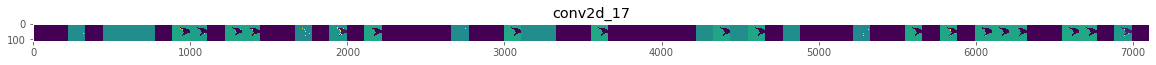

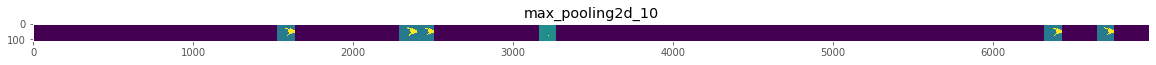

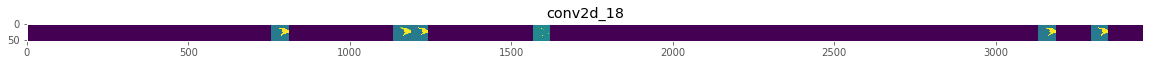

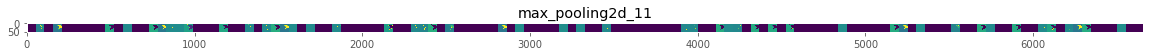

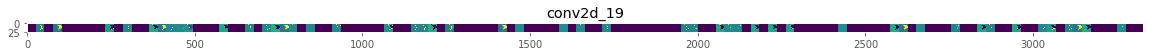

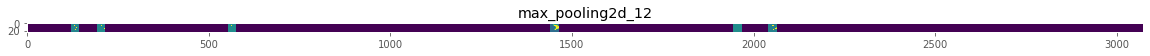

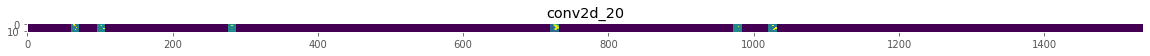

In [127]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.

img_path = random.choice(qdata)
img = img_path  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        18
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        18
           9       1.00      0.94      0.97        18
           A       1.00      1.00      1.00        18
           B       1.00      1.00      1.00        18
           C       1.00      1.00      1.00        17
           D       1.00      0.94      0.97        17
           E       1.00      1.00      1.00        17
           F       1.00      1.00      1.00        18
           G       1.00      1.00      1.00        1

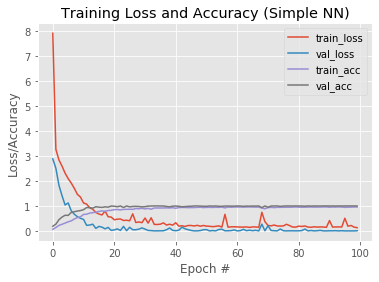

In [128]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("Acc_loss_sign")

In [130]:
print("[INFO] serializing network...")
model.save("output/finalactivity3.model")

# serialize the label binarizer to disk
f = open("output/finallb3.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network...


In [ ]:

# serialize the model to disk
print("[INFO] serializing network...")
model.save(args["model"])
 
# serialize the label binarizer to disk
f = open(args["label_bin"], "wb")
f.write(pickle.dumps(lb))
f.close()
Line 168 saves our 